# Miniproject 5 : PCA, Support Vector Machines and CNN

Total Points: 15     

Task 1 and Tas 2 : 5 Points      
Task 3:            10 points (Alternative to your take home exam.)


## Notes on Miniproject 5
For Task 1, the biplot code was taken from this [article](https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e).

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

### Task 1: 
Recreate Fig 12.4 from the book for USArrest Data.         

Comment (4 peices of information) on two different plots PCA visualization using two principal components with and without scaling the data.         

(Note: You can refer to the github repo I introduced at the beginning of the course.)


In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Get USArrest dataset
df = pd.read_csv('pca_resources/USArrests.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
# Display several entries
df.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
names = ['Murder', 'Assault', 'UrbanPop', 'Rape']

In [6]:
# Get all state names
state_names = df['Unnamed: 0'].values

In [7]:
# Get scaled and unscaled input data
x = df[names].values
x_std = StandardScaler().fit_transform(x)
n = x.shape[1]

In [8]:
# PCA on scaled data
pca_std = PCA(n_components=n)
pca_std.fit(x_std)
project_std = pca_std.transform(x_std)

In [9]:
# PCA on unscaled data
pca = PCA(n_components=n)
pca.fit(x)
project = pca.transform(x)

In [10]:
project_std[0]

array([ 0.98556588,  1.13339238, -0.44426879,  0.15626714])

In [11]:
from matplotlib.colors import ListedColormap

def biplot(
    projected_data=None, 
    coeff=None, 
    pc_names=None, 
    labels=None,
    mult=1.0,
    show_state_names=False,
):
    '''
    Original implementation by: 
      Serafeim Loukas, serafeim.loukas@epfl.ch
    
    Inputs:
       projected_data:   the projected data
       coeff:            the eigenvectors (PCs)
       pc_names:         names of principal components
       labels:           labels for data samples
       mult:             multiplier for line lengths
       show_state_names: show state names? (only for task 1)
    '''
    xs = projected_data[:,0] # projection on PC1
    ys = projected_data[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    
    plt.figure(figsize=(8,6), dpi=100)
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(xs, ys, c=labels, cmap=cm_bright, marker='.')
    
    if show_state_names:
        for i in range(xs.shape[0]):
            plt.text(
                xs[i],
                ys[i],
                state_names[i],
                color='b',
                ha = 'center', 
                va = 'center', 
                fontsize=6
            )
    
    for i in range(n):
        # Create arrows to indicate direction of variance
        #  for each feature given first two PCs
        len_x = coeff[i,0] * mult
        len_y = coeff[i,1] * mult
        
        plt.arrow(
            x=0, 
            y=0, 
            dx=len_x, 
            dy=len_y, 
            color='y', 
            head_width=0.1,
            head_length=0.05,
            linewidth=0.5,
            length_includes_head=True
        )
        plt.text(
            len_x * 1.15, 
            len_y * 1.15, 
            pc_names[i], 
            color = 'k', 
            ha = 'center', 
            va = 'center', 
            fontsize=10
        )

    plt.xlabel("First Principal Component", size=12)
    plt.ylabel("Second Principal Component", size=12)
    
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    
    abs_min = min(-limx, -limy)
    abs_max = max(limx, limy)
    
    plt.xlim([abs_min, abs_max])
    plt.ylim([abs_min, abs_max])
    #plt.xlim([xs.min(), xs.max()])
    #plt.ylim([ys.min(), ys.max()])
    
    plt.tick_params(axis='both', which='both', labelsize=12)

### Scaled Data Biplot

In [12]:
pca_std.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

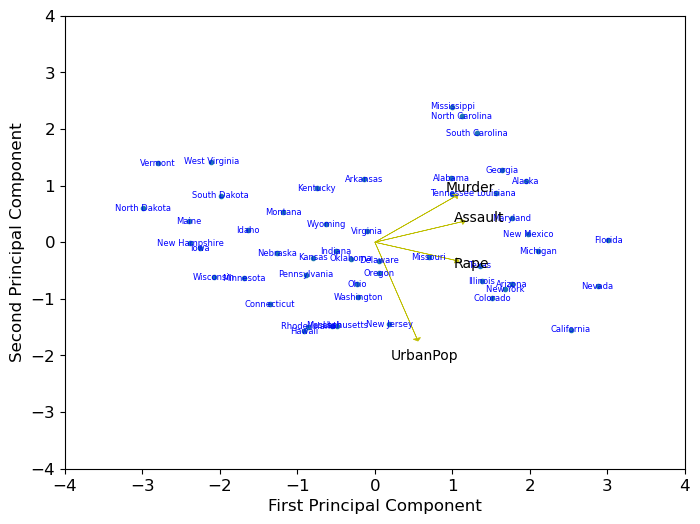

In [13]:
# Scaled data
biplot(
    projected_data=project_std, 
    coeff=np.transpose(pca_std.components_), 
    pc_names=names, 
    mult=2.0,
    show_state_names=True
)

### Unscaled Data Biplot

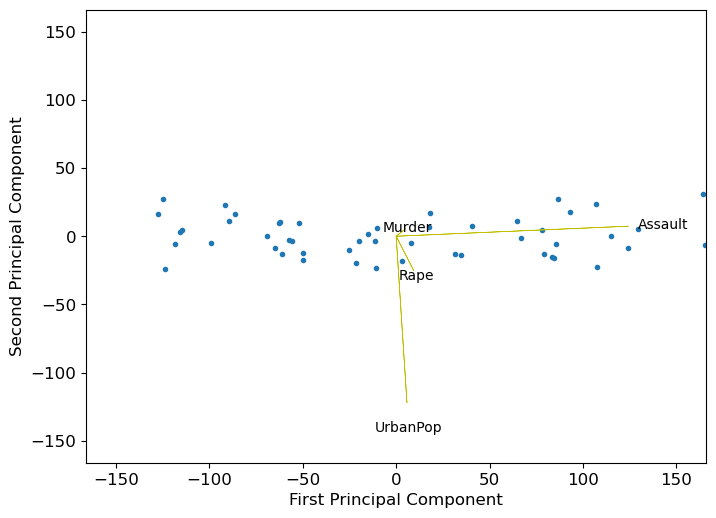

In [14]:
# Unscaled data
biplot(
    projected_data=project, 
    coeff=np.transpose(pca.components_), 
    pc_names=names, 
    mult=125.0,
    show_state_names=False
)

### Task 2: 
Separating concentric circles using PCA and KPCA    

1. Create a 1000 data points of two concentric circles, and plot data points from two circles in  color red and blue.      

You can use the make_circles function from sklearn.dataset to do this.       
make_circles(n_samples, random_state, noise, factor)      
use:   n_samples = 1000, random_state = 123, noise = 0.1, factor = 0.2     

2. Do PCA on the data and visualize PC decomposition using 2 PCs. 

3. Implement Kernel PCA using RBF kernel.      
You can use KernelPCA from sklearn.decomposition

3. Do KPCA visualization using two Kernel PCs and compare with Linear PCA visualization. You might want to try with different gamma for RBF. For example, case1: Gamma = 5, case2: Gamma = 15.      

4. Repeat 1-3 for half moon data. 

In [15]:
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.decomposition import KernelPCA

### Circle Data

In [16]:
# 1) Make 1000 data points of two concentric circles
circles = make_circles(
    n_samples=1000,
    random_state=123,
    noise=0.1, 
    factor=0.2
)

In [17]:
# 2) Use PCA to visualize first two PCs
circles_pca = PCA(n_components=2)
circles_pca.fit(circles[0])
circle_project = circles_pca.transform(circles[0])

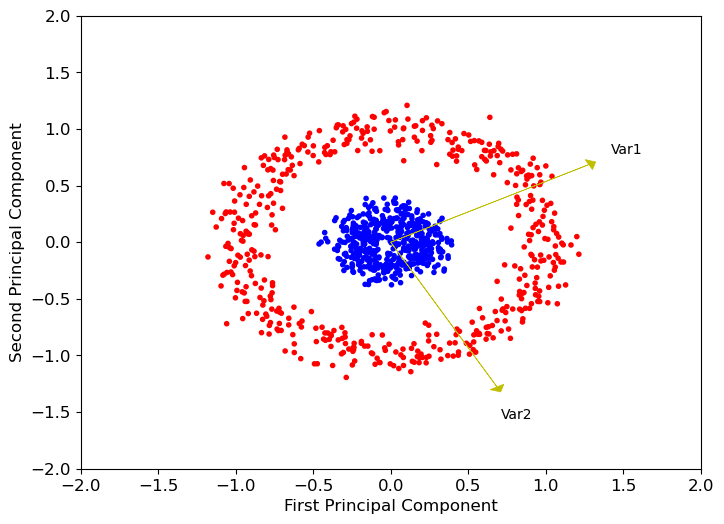

In [18]:
biplot(
    projected_data=circle_project, 
    coeff=np.transpose(circles_pca.components_), 
    pc_names=['Var1', 'Var2'], 
    labels=circles[1],
    mult=1.5
)

In [19]:
# 3) Apply kPCA using RBF kernel to circle data
circle_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=2.0)
circle_kpca.fit(circles[0])
circle_rbf_project = circle_kpca.transform(circles[0])

In [20]:
circle_kpca.fit(circles[0])

KernelPCA(gamma=2.0, kernel='rbf', n_components=2)

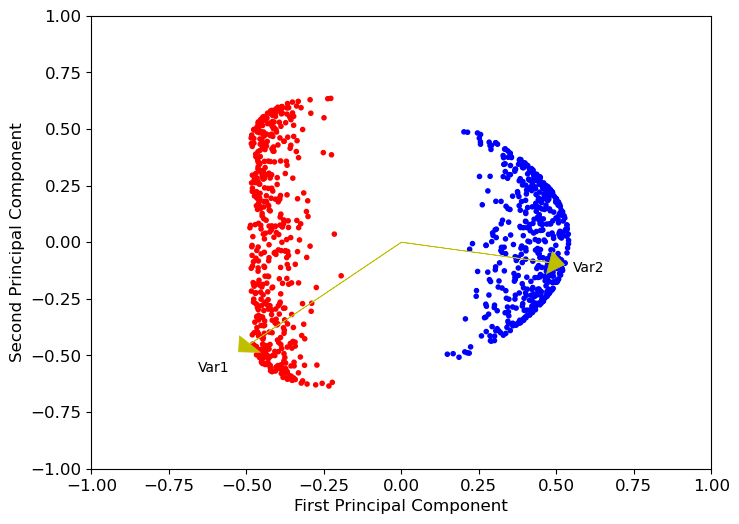

In [21]:
# 4) Visualize kernel PCA
biplot(
    projected_data=circle_rbf_project, 
    coeff=np.transpose(circle_kpca.eigenvectors_), 
    pc_names=['Var1', 'Var2'], 
    labels=circles[1],
    mult=15.0
)

The regular PCA approach's principal components will always be along their respective axes (for the variances of the x- and y-directions). 

For different values of `gamma`, kernel PCA (with RBF kernel) can change the shape of the data and therefore the variance, thus the directions of the variance for both principal components will be same. 

### Moon Data

In [22]:
# 1) Make 1000 data points of two moons
moons = make_moons(
    n_samples=1000,
    random_state=123,
    noise=0.1
)

In [23]:
# 2) Use PCA to visualize first two PCs
pca_moons = PCA(n_components=2)
pca_moons.fit(moons[0])
moons_project = pca_moons.transform(moons[0])

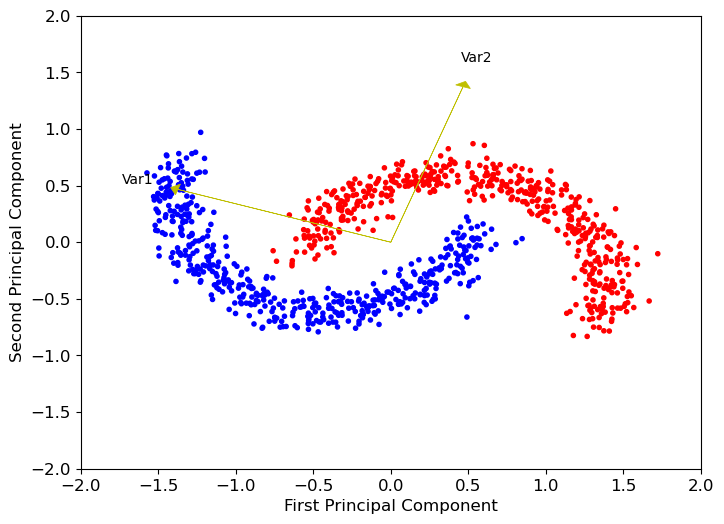

In [24]:
biplot(
    projected_data=moons_project, 
    coeff=np.transpose(pca_moons.components_), 
    pc_names=['Var1', 'Var2'], 
    labels=moons[1],
    mult=1.5
)

In [25]:
# 3) Apply kPCA using RBF kernel to moon data
kpca_moons = KernelPCA(n_components=2, kernel='rbf', gamma=15.0)
kpca_moons.fit(moons[0])
moons_rbf_project = kpca_moons.transform(moons[0])

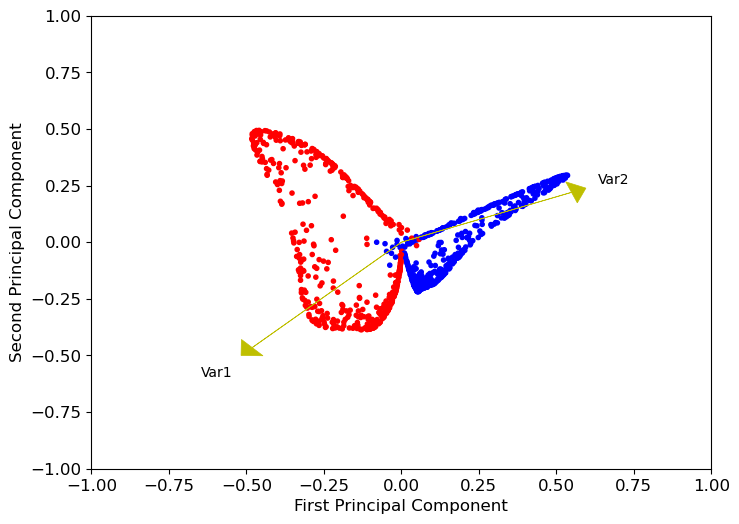

In [26]:
# 4) Visualize kPCA on moons data
biplot(
    projected_data=moons_rbf_project, 
    coeff=np.transpose(kpca_moons.eigenvectors_), 
    pc_names=['Var1', 'Var2'], 
    labels=moons[1],
    mult=10.0
)

### Task 3: 
MNIST data classification using neural nets and CNN in pytorch.    
1. Perform  classification on MNIST data using fully connected neural nets.      
https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627      

2. Perform  classification on MNIST data using convolutional neural nets.  
https://medium.com/@nutanbhogendrasharma/pytorch-convolutional-neural-network-with-mnist-dataset-4e8a4265e118

Note: The links provided here are just some examples, there are millions tutorials available, feel free to use any as your reference. 

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
from torchvision.datasets import MNIST
import torchvision.transforms as transforms

In [28]:
# Custom imports
# Refer to modules directory: pytorch_wrapper
import pytorch_wrapper.gpu_funcs as gf
import pytorch_wrapper.plotting as pl
import pytorch_wrapper.generic_train_eval as te

### Set up data loaders for MLP and CNN models to use.

In [29]:
batch_size = 128

In [30]:
# Get dataset
dataset = MNIST(root='data', download=True, train=True, transform=transforms.ToTensor())
test_size = 5000
train_size = len(dataset) - test_size

# Create subset datasets for training and testing
train_subds, test_subds = random_split(
    dataset=dataset,
    lengths=[train_size, test_size],
    generator=torch.Generator().manual_seed(42)
)

In [31]:
# Create dataloader objects
train_loader = DataLoader(
    dataset=train_subds,
    batch_size=batch_size,
    shuffle=True,
    num_workers=3,
    pin_memory=True
)

test_loader = DataLoader(
    dataset=test_subds,
    batch_size=batch_size,
    shuffle=True,
    num_workers=3,
    pin_memory=True
)

### Task 3: 1. MLP MNIST Classifier
Note that I used Pytorch to implement the MLP and CNN models, as well as use several modules to facilitate training and evaluation, among other things. The code for this code is contained in the folder `pytorch_wrapper`. 

In [32]:
# Loss function and optimizer
mlp_loss_func = torch.nn.CrossEntropyLoss()
mlp_opt_func = torch.optim.SGD

In [33]:
# Config for MLP
# batch size same for both models
n_epochs = 30
input_features = 28*28
n_classes = 10
mlp_lr = 0.01

In [34]:
# Define MLP model
class MLP(nn.Module):
    ''' Simple Multilayer Perceptron/Neural Network'''
    def __init__(self, n_features=None, n_outputs=None):
        ''' Constructor
        :param n_features: (int) number of input features for first layer
        :param n_outputs: (int) number of outputs for last layer
        '''
        super().__init__()

        self.linear1 = nn.Linear(in_features=n_features, out_features=16)
        self.linear2 = nn.Linear(in_features=16, out_features=16)
        self.out1 = nn.Linear(in_features=16, out_features=n_outputs)

    def forward(self, x=None):
        ''' Forward propagation to get prediction
        :param x: tensor for data
        :return: model prediction
        '''
        out = x.view(x.size(0), -1)
        out = self.linear1(out)
        out = self.linear2(out)
        out = self.out1(out)
        return out

In [35]:
mnist_mlp = MLP(n_features=input_features, n_outputs=n_classes)

In [36]:
# Switch models and data to device
device = gf.get_default_device()
device

device(type='cuda')

In [37]:
train_loader = gf.DeviceDataLoader(train_loader, device)
test_loader = gf.DeviceDataLoader(test_loader, device)
mnist_mlp = gf.move_to_device(mnist_mlp, device)

In [38]:
# Train MLP model on MNIST data
mlp_history = te.generic_train(
    model=mnist_mlp,
    epochs=n_epochs,
    lr=mlp_lr,
    train_loader=train_loader,
    val_loader=test_loader,
    loss_func=mlp_loss_func,
    opt_func=mlp_opt_func
)

Epoch 1/30: Train loss=1.8892, Val loss = 1.3458, Val accuracy = 0.6187
Epoch 2/30: Train loss=0.9392, Val loss = 0.6863, Val accuracy = 0.8092
Epoch 3/30: Train loss=0.5734, Val loss = 0.5147, Val accuracy = 0.8564
Epoch 4/30: Train loss=0.4679, Val loss = 0.4486, Val accuracy = 0.8699
Epoch 5/30: Train loss=0.4214, Val loss = 0.4236, Val accuracy = 0.8824
Epoch 6/30: Train loss=0.3960, Val loss = 0.3989, Val accuracy = 0.8871
Epoch 7/30: Train loss=0.3789, Val loss = 0.3798, Val accuracy = 0.8896
Epoch 8/30: Train loss=0.3662, Val loss = 0.3735, Val accuracy = 0.8922
Epoch 9/30: Train loss=0.3562, Val loss = 0.3711, Val accuracy = 0.8949
Epoch 10/30: Train loss=0.3480, Val loss = 0.3543, Val accuracy = 0.8998
Epoch 11/30: Train loss=0.3407, Val loss = 0.3517, Val accuracy = 0.9016
Epoch 12/30: Train loss=0.3348, Val loss = 0.3478, Val accuracy = 0.8947
Epoch 13/30: Train loss=0.3290, Val loss = 0.3483, Val accuracy = 0.8998
Epoch 14/30: Train loss=0.3240, Val loss = 0.3363, Val accur

In [39]:
# Evaluate MLP model to check classification accuracy
mlp_scores = te.generic_evaluate(
    model=mnist_mlp, 
    val_loader=test_loader,
    loss_func=mlp_loss_func
)

print('Test scores (MLP): ', mlp_scores)

Test scores (MLP):  {'val_loss': 0.30605074763298035, 'val_acc': 0.9125000238418579}


In [40]:
# Save MLP model
filename = 'mnist_mlp.pth'
torch.save(mnist_mlp.state_dict(), filename)

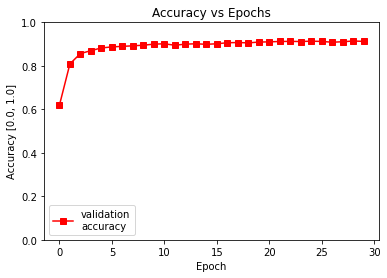

In [41]:
pl.plot_accuracy(mlp_history)

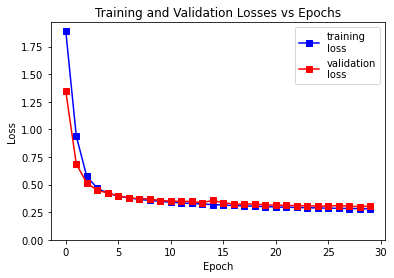

In [42]:
pl.plot_losses(mlp_history)

In [43]:
# Show several sample images and predictions
test_dataset = MNIST(root='data/', train=False, transform=transforms.ToTensor())

In [44]:
x, label = dataset[0]
x = x.unsqueeze(0)
pred = te.predict(x=x, model=mnist_mlp)
print('True label: {}, Predicted: {}'.format(label, pred))

True label: 5, Predicted: 5


In [45]:
x, label = dataset[111]
x = x.unsqueeze(0)
pred = te.predict(x=x, model=mnist_mlp)
print('True label: {}, Predicted: {}'.format(label, pred))

True label: 3, Predicted: 3


In [46]:
x, label = dataset[222]
x = x.unsqueeze(0)
pred = te.predict(x=x, model=mnist_mlp)
print('True label: {}, Predicted: {}'.format(label, pred))

True label: 4, Predicted: 4


In [47]:
x, label = dataset[777]
x = x.unsqueeze(0)
pred = te.predict(x=x, model=mnist_mlp)
print('True label: {}, Predicted: {}'.format(label, pred))

True label: 8, Predicted: 8


### Task 3: 2. CNN MNIST Classifier
I based this CNN model on LeNet-5 (Yann LeCun's original implementation).

In [48]:
# Config for CNN
# batch size same for both models
in_channels = 1
n_epochs = 25
cnn_lr = 0.001

In [49]:
# Loss function and optimizer
cnn_loss_func = torch.nn.CrossEntropyLoss()
cnn_opt_func = torch.optim.Adam

In [50]:
# Define CNN model
def conv_block(in_channels=None, out_channels=None, kernel_size=(3, 3), padding=1):
    ''' Convolutional block
    
    :param in_channels: inout channels
    :param out_channels: output channels
    :param kernel_size: (tuple) size of kernel matrices
    :param padding: padding for input data
    
    :return: torch.nn Sequential object
    '''
    block = nn.Sequential(
        nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size, padding=padding),
        nn.Sigmoid(),
        nn.MaxPool2d(kernel_size=(2, 2))
    )
    return block

In [51]:
class CNN(nn.Module):
    ''' Simple CNN architecture with no optimizations'''
    def __init__(self, in_channels=None, n_outputs=None):
        ''' Constructor
        
        :param n_channels: (int) number of channels in input
        :param n_outputs: (int) number of outputs for last layer
        '''
        super().__init__()

        # Conv blocks reduce spatial dims by 1/2 (using integer division)
        self.conv1 = conv_block(in_channels=in_channels, out_channels=32) # out shape: 32x14x14
        self.conv2 = conv_block(in_channels=32, out_channels=64) # out shape: 64x7x7
        self.conv3 = conv_block(in_channels=64, out_channels=128) # out shape: 128x3x3
        self.fully_connected = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=128*3*3, out_features=512),
            nn.Sigmoid(),
            nn.Linear(in_features=512, out_features=128),
            nn.Sigmoid(),
            nn.Linear(in_features=128, out_features=10)
        )

    def forward(self, x):
        ''' Forward Propagate
        
        :param x: tensor in shape (batch x channels x height x width)
        
        :return: prediction on batch
        '''
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.conv3(out)
        out = self.fully_connected(out)
        return out

In [52]:
mnist_cnn = CNN(in_channels=in_channels, n_outputs=n_classes)

In [53]:
mnist_cnn = gf.move_to_device(mnist_cnn, device)

In [54]:
# Train CNN model on MNIST data
cnn_history = te.generic_train(
    model=mnist_cnn,
    epochs=n_epochs,
    lr=cnn_lr,
    train_loader=train_loader,
    val_loader=test_loader,
    loss_func=cnn_loss_func,
    opt_func=cnn_opt_func
)

Epoch 1/25: Train loss=2.3064, Val loss = 2.3038, Val accuracy = 0.1027
Epoch 2/25: Train loss=2.0822, Val loss = 0.7468, Val accuracy = 0.7939
Epoch 3/25: Train loss=0.2828, Val loss = 0.1381, Val accuracy = 0.9639
Epoch 4/25: Train loss=0.1121, Val loss = 0.1015, Val accuracy = 0.9699
Epoch 5/25: Train loss=0.0810, Val loss = 0.0796, Val accuracy = 0.9762
Epoch 6/25: Train loss=0.0624, Val loss = 0.0685, Val accuracy = 0.9781
Epoch 7/25: Train loss=0.0521, Val loss = 0.0632, Val accuracy = 0.9805
Epoch 8/25: Train loss=0.0429, Val loss = 0.0593, Val accuracy = 0.9805
Epoch 9/25: Train loss=0.0368, Val loss = 0.0673, Val accuracy = 0.9807
Epoch 10/25: Train loss=0.0322, Val loss = 0.0505, Val accuracy = 0.9832
Epoch 11/25: Train loss=0.0265, Val loss = 0.0619, Val accuracy = 0.9824
Epoch 12/25: Train loss=0.0236, Val loss = 0.0480, Val accuracy = 0.9838
Epoch 13/25: Train loss=0.0218, Val loss = 0.0453, Val accuracy = 0.9855
Epoch 14/25: Train loss=0.0189, Val loss = 0.0473, Val accur

In [55]:
# Evaluate CNN model to check classification accuracy
cnn_scores = te.generic_evaluate(
    model=mnist_cnn, 
    val_loader=test_loader,
    loss_func=cnn_loss_func
)

print('Test scores (CNN): ', cnn_scores)

Test scores (CNN):  {'val_loss': 0.03904307633638382, 'val_acc': 0.989453136920929}


In [56]:
# Save CNN model
filename = 'mnist_cnn.pth'
torch.save(mnist_cnn.state_dict(), filename)

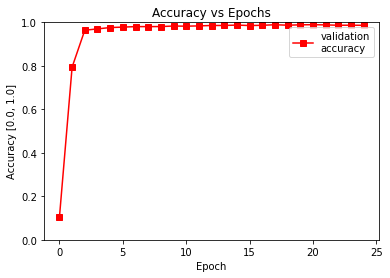

In [57]:
pl.plot_accuracy(cnn_history)

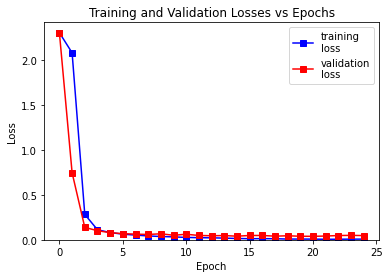

In [58]:
pl.plot_losses(cnn_history)

In [59]:
# Test CNN on several samples
x, label = dataset[0]
x = x.unsqueeze(0)
pred = te.predict(x=x, model=mnist_cnn)
print('True label: {}, Predicted: {}'.format(label, pred))

True label: 5, Predicted: 5


In [60]:
x, label = dataset[111]
x = x.unsqueeze(0)
pred = te.predict(x=x, model=mnist_cnn)
print('True label: {}, Predicted: {}'.format(label, pred))

True label: 3, Predicted: 3


In [61]:
x, label = dataset[222]
x = x.unsqueeze(0)
pred = te.predict(x=x, model=mnist_cnn)
print('True label: {}, Predicted: {}'.format(label, pred))

True label: 4, Predicted: 4


In [62]:
x, label = dataset[777]
x = x.unsqueeze(0)
pred = te.predict(x=x, model=mnist_cnn)
print('True label: {}, Predicted: {}'.format(label, pred))

True label: 8, Predicted: 8
